In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tpot import TPOTClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost

from sklearn.metrics import roc_auc_score
import scikitplot as skplt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [63]:
#valores estaticos
TEST_SIZE=0.20
RANDOM_STATE=42

In [73]:
df = pd.read_csv("../../data/processed/train/m2.0 - churn estricto - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df.info()

/home/seba/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320314 entries, 1690 to 21260067
Data columns (total 74 columns):
6m                                1320314 non-null int64
5m                                1320314 non-null int64
4m                                1320314 non-null int64
3m                                1320314 non-null int64
2m                                1320314 non-null int64
1m                                1320314 non-null int64
6m_canc                           1320314 non-null int64
5m_canc                           1320314 non-null int64
4m_canc                           1320314 non-null int64
3m_canc                           1320314 non-null int64
2m_canc                           1320314 non-null int64
1m_canc                           1320314 non-null int64
6m_dem                            1320314 non-null int64
5m_dem                            1320314 non-null int64
4m_dem                            1320314 non-null int64
3m_dem                      

In [74]:
#opcional: elimino los registros repetidos (sin considerar el id)
df.drop_duplicates(inplace=True)

In [75]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1] == 1

# split data set

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [77]:
print("train: {} - test: {}".format(len(X_train), len(X_test)))

train: 362250 - test: 90563


In [78]:
#distrib de churn
np.sum(y_train) / len(y_train)

0.033330572808833676

In [79]:
X_train.head()

,6m,5m,4m,3m,2m,1m,6m_canc,5m_canc,4m_canc,3m_canc,...,CITY_SANTIAGO DEL ESTERO,CITY_TIERRA DEL FUEGO,CITY_TUCUMAN,ModoPago_BA,ModoPago_CC,ModoPago_Mix,ModoPago_PP,ModoPago_SJ,ModoPago_TA,ModoPago_TM
18571015,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14848718,1,1,2,2,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5628721,2,2,3,3,3,3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19378689,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3559563,1,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Modelo 1: Simple Random Forest

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [81]:
#modelo sin optimizar de prueba

class_weight = dict({0:1, 1:20})
clf = RandomForestClassifier(class_weight=class_weight,
                            criterion='gini', max_depth=None, max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=20,
                            min_samples_split=6, min_weight_fraction_leaf=0.0,
                            n_estimators=50,
                            n_jobs=-1, random_state=RANDOM_STATE)


In [84]:
# Fit grid search	
clf.fit(X_train, y_train)
#predict
y_pred_clf = clf.predict(X_test)
# Test data roc auc of model with best params
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred_clf))

Test set roc auc score for best params: 0.977 


/home/seba/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


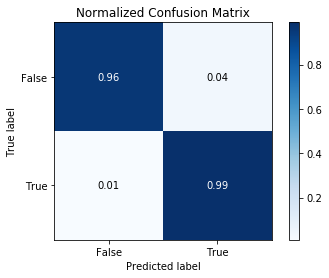

In [85]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_clf, normalize=True)

### Test set

In [86]:
#evaluación contra el testeo externo
df_testo_ext = pd.read_csv("../../data/processed/testeo/m2.0 - churn estricto - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_testo_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1690 to 21260067
Data columns (total 74 columns):
6m                                50000 non-null int64
5m                                50000 non-null int64
4m                                50000 non-null int64
3m                                50000 non-null int64
2m                                50000 non-null int64
1m                                50000 non-null int64
Churn                             50000 non-null int64
edad_r                            50000 non-null int64
6m_canc                           50000 non-null int64
5m_canc                           50000 non-null int64
4m_canc                           50000 non-null int64
3m_canc                           50000 non-null int64
2m_canc                           50000 non-null int64
1m_canc                           50000 non-null int64
6m_dem                            50000 non-null int64
5m_dem                            50000 non-null int64
4m_de

In [87]:
X_testo_ext = df_testo_ext.drop("Churn", axis=1)
y_testeo_ext = df_testo_ext["Churn"]

In [88]:
df_testo_ext.Churn.value_counts() / len(df_testo_ext)

0    0.98746
1    0.01254
Name: Churn, dtype: float64

In [89]:
y_pred_testeo_ext = clf.predict(X_testo_ext)
roc_auc_score(y_testeo_ext, y_pred_testeo_ext)

0.4973387652776665

/home/seba/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


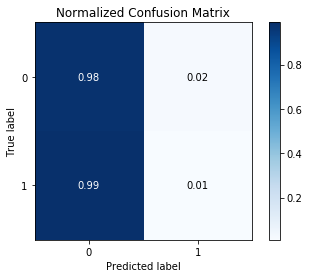

In [90]:
skplt.metrics.plot_confusion_matrix(y_testeo_ext, y_pred_testeo_ext, normalize=True)

# Modelo 2: Random Forest optimizado

In [52]:
#param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range = [2, 4, 6, 8]
#param_range_fl = [1.0, 0.5, 0.1]
class_weight_range = [{0:1, 1:1},{0:1, 1:9},{0:1, 1:15},{0:1, 1:20}]
#param_range_fl = np.power(10., np.arange(-4, 4))


#'clf__max_depth': param_range,
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__min_samples_split': param_range,
    'clf__class_weight' : class_weight_range}]

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=RANDOM_STATE))])

# Construct grid searches
jobs = -1
#corregir la metrica usando una metrica compuesta (ver link)
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5

#refit=True, entrena el mejor modelo obtenido con todo el dataset! :D
#verbose => mientras mayor el número, más info va mostrando.
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring=scoring,
            cv=cv,
            verbose=2,
            refit="AUC",
            n_jobs=jobs)
            
gs_rf

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...timators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'clf__criterion': ['gini', 'entropy'], 'clf__min_samples_leaf': [2, 4, 6, 8], 'clf__min_samples_split': [2, 4, 6, 8], 'clf__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 9}, {0: 1, 1: 15}, {0: 1, 1: 20}]}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
       verbose=2)

In [53]:
# Fit grid search	
gs_rf.fit(X_train, y_train)
# Best params
print('Best params: %s' % gs_rf.best_params_)
# Best training data roc auc
print('Best training roc auc: %.3f' % gs_rf.best_score_)
# Predict on test data with best params
y_pred_gs_rf = gs_rf.predict(X_test)
# Test data roc auc of model with best params
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred_gs_rf))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=2 
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=2 
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=2 
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=2, total=  33.2s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=2, total=  35.0s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 1

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.0min


[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=6, total=  31.8s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=6, total=  32.0s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8, total=  31.2s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8, total=  33.5s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_

[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  31.6s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=4, total=  34.3s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  30.2s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  33.1s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=gini, clf__min_s

[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=2, total=  32.0s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4, total=  30.4s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4, total=  30.5s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4, total=  31.5s
[CV] clf__class_weight={0: 1, 1: 1}, clf__cr

[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  31.0s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  34.0s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2, total=  30.3s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2, total=  30.5s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__c

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 25.4min


[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8, total=  29.3s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  32.8s
[CV] clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8, total=  30.1s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8, total=  29.7s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 1}, clf__criteri

[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=6, total=  32.8s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=6, total=  34.7s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=6, total=  32.1s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=6, total=  32.1s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_s

[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=4, total=  33.6s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=4, total=  31.4s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=4, total=  34.3s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=4, total=  31.5s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=gini, clf__min_

[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=2, total=  33.5s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=2, total=  32.6s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=2, total=  31.7s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=2, total=  32.3s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__c

[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  31.5s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  32.7s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  34.8s
[CV] clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 9}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  30.3s
[CV] clf__class_weight={0: 1, 1: 9}, clf__cr

[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=4, total=  31.9s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=6, total=  32.1s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=6, total=  32.1s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=6, total=  32.8s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, 

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 58.4min


[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8, total=  33.1s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8, total=  32.3s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=8, total=  33.4s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=2, total=  30.6s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, 

[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  32.0s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  30.2s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  32.1s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=8, total=  33.4s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=gini, 

[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4, total=  33.1s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4, total=  31.9s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=4, total=  32.9s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=6, total=  31.8s
[CV] clf__class_weight={0: 1, 1: 15}

[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2, total=  32.4s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2, total=  30.2s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2, total=  31.8s
[CV] clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 15}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=2, total=  30.3s
[CV] clf__class_weight={0: 1, 1: 15}

[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=8, total=  31.9s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=8, total=  32.6s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=8, total=  33.1s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=8, total=  31.8s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=4, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, 

[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6, total=  31.3s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6, total=  32.7s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6, total=  32.0s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6, total=  32.6s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, 

[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=2, clf__min_samples_split=4, total=  33.7s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=2, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=2, clf__min_samples_split=4, total=  31.1s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=2, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=2, clf__min_samples_split=4, total=  32.6s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=2, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=2, clf__min_samples_split=4, total=  29.2s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=2, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 20

[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=4, clf__min_samples_split=8, total=  32.7s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=2, total=  33.2s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=2 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=2, total=  31.1s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=2, total=  33.6s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=4 
[CV]  clf__class_weight={0: 1, 1: 20

[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  32.1s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  31.8s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8, total=  28.7s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8, total=  33.0s
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8, total=  29.1s
[CV]  clf__class_weig

[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 104.6min finished


Best params: {'clf__class_weight': {0: 1, 1: 1}, 'clf__criterion': 'entropy', 'clf__min_samples_leaf': 6, 'clf__min_samples_split': 2}
Best training roc auc: 0.990
Test set roc auc score for best params: 0.675 


/home/seba/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


KeyError: 'clf__min_samples_split'

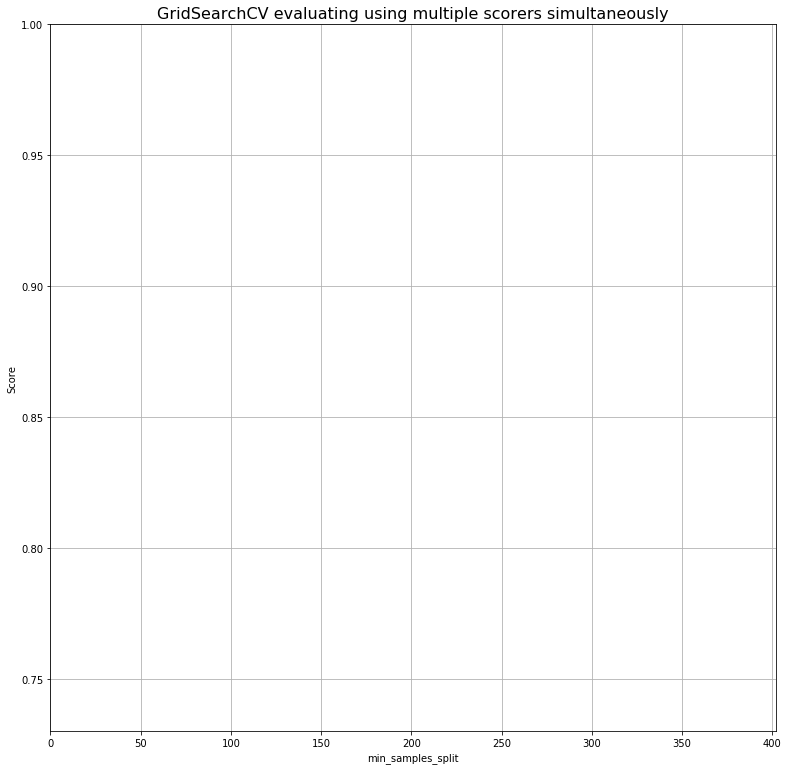

In [55]:
#plotting the result

results = gs_rf.cv_results_

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['clf__min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

/home/seba/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


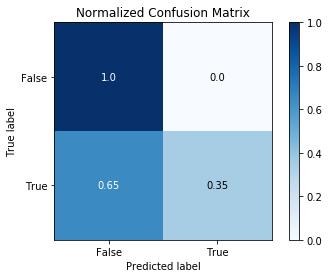

In [56]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_gs_rf, normalize=True)

In [57]:
print("Grid scores on development set:")
print()
means = gs_rf.cv_results_['mean_test_score']
stds = gs_rf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs_rf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, gs_rf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Grid scores on development set:



KeyError: 'mean_test_score'

In [31]:
#evaluación contra el testeo externo
df_testo_ext = pd.read_csv("../../data/processed/testeo/m2.0 - churn estricto - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_testo_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1690 to 21260067
Data columns (total 74 columns):
6m                                50000 non-null int64
5m                                50000 non-null int64
4m                                50000 non-null int64
3m                                50000 non-null int64
2m                                50000 non-null int64
1m                                50000 non-null int64
Churn                             50000 non-null int64
edad_r                            50000 non-null int64
6m_canc                           50000 non-null int64
5m_canc                           50000 non-null int64
4m_canc                           50000 non-null int64
3m_canc                           50000 non-null int64
2m_canc                           50000 non-null int64
1m_canc                           50000 non-null int64
6m_dem                            50000 non-null int64
5m_dem                            50000 non-null int64
4m_de

In [58]:
X_testo_ext = df_testo_ext.drop("Churn", axis=1)
y_testeo_ext = df_testo_ext["Churn"]

In [59]:
df_testo_ext.Churn.value_counts() / len(df_testo_ext)

0    0.98746
1    0.01254
Name: Churn, dtype: float64

In [60]:
y_pred_testeo_ext = gs_rf.predict(X_testo_ext)

In [61]:
roc_auc_score(y_testeo_ext, y_pred_testeo_ext)

0.499777206165313

/home/seba/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


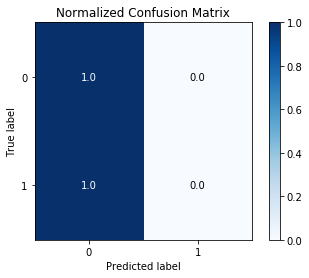

In [62]:
skplt.metrics.plot_confusion_matrix(y_testeo_ext, y_pred_testeo_ext, normalize=True)

In [63]:
#bajando el modelo
from sklearn.externals import joblib

joblib.dump(gs_rf.best_estimator_, '../../models/M2.0 - Modelo RandomForest (0.85-0.69) - Churn estricto- 6m.N.polizaXmes y Info.Cliente.M.Pago.pkl')

['../../models/M1.0 - Modelo RandomForest (0.85-0.69) - Churn estricto- 6m.N.polizaXmes y Info.Cliente.M.Pago.pkl']

# Realizando predicción para entregar

In [64]:
df_pred = pd.read_csv("../../data/processed/test_cliente/m2.0 - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1690 to 21260067
Data columns (total 55 columns):
6m                                50000 non-null int64
5m                                50000 non-null int64
4m                                50000 non-null int64
3m                                50000 non-null int64
2m                                50000 non-null int64
1m                                50000 non-null int64
edad_r                            50000 non-null int64
GENDER_F                          50000 non-null int64
GENDER_M                          50000 non-null int64
MARITAL_STATUS_Casado             50000 non-null int64
MARITAL_STATUS_Conviv             50000 non-null int64
MARITAL_STATUS_Divorciado         50000 non-null int64
MARITAL_STATUS_No Corresp         50000 non-null int64
MARITAL_STATUS_Separado           50000 non-null int64
MARITAL_STATUS_Soltero            50000 non-null int64
MARITAL_STATUS_Union Civ          50000 non-null int64
MARIT

In [65]:
y_pred_predFin  = gs_rf.best_estimator_.predict_proba(df_pred)

In [95]:
csv = pd.DataFrame()
csv["CUSTOMER_ID"] = df_pred.index.values
csv["PRED"] = pd.DataFrame(y_pred_predFin)[1]
csv.head()

,CUSTOMER_ID,PRED
0,1690,0.006911
1,5575,0.096964
2,7968,0.134929
3,9028,0.035026
4,9860,0.010475


In [96]:
csv.to_csv("../../data/processed/prediccion_para_cliente/m2.0 - predict - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv")